In [21]:
import numpy as np 
def per_mon(Q, R, n):
    return R * (1+R)**n / ((1+R)**n - 1) * Q

# Q = 2220000
# R = 0.052 / 12
# n = 30 * 12
R0 = 0.02 # 理财基础利率
Q = 1013316.84
R = (0.033-R0) / 12
n = 121

print(per_mon(Q, R, n))


8939.916257705745


In [22]:
def pre_Q(X, R, n, k, Q):
    return Q - ((1+R)**(n-k) - 1)/(R*(1+R)**(n-k)) * X

X = 9856.36
# n = 204
k = 80
# Q = 1537183.43

print(pre_Q(X, R, n, k, Q))

pQ = pre_Q(X, R, n, k, Q)





618258.5295710755


68413.02718239541


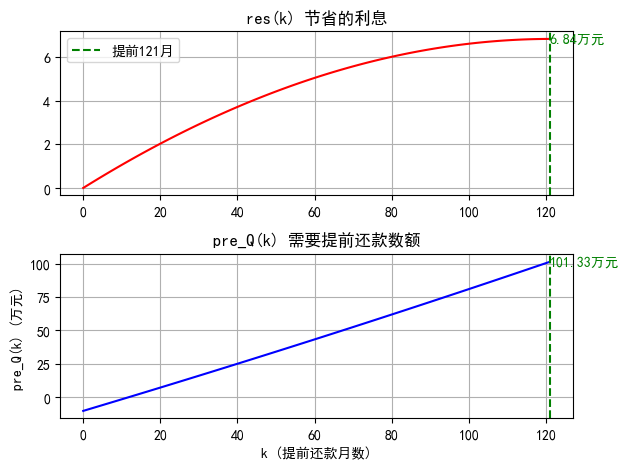

In [23]:
def res(k, n, R, Q):
    # $Res(k)=Y(0)-Y(k)=\frac{kR(1+R)^n - (1+R)^k + 1}{(1+R)^n-1}Q_0$
    return (k*R*(1+R)**n - (1+R)**k + 1)/((1+R)**n - 1) * Q

print(res(121, n, R, Q))


import matplotlib.pyplot as plt
import matplotlib as mpl

# 配置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 使用黑体或微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# plot res(k)

k = np.arange(0, n+1)
y1 = res(k, n, R, Q)
y2 = pre_Q(X, R, n, k, Q)

# subplot 1
plt.subplot(211)
plt.plot(k, y1 / 10000, 'r')
plt.title('res(k) 节省的利息')

# 标记提前121月节省的利息
plt.axvline(x=121, color='g', linestyle='--', label='提前121月')
plt.text(121, y1[121] / 10000, f'{y1[121] / 10000:.2f}万元', color='g', fontsize=10, ha='left', va='center')
plt.legend()

plt.grid(True)

# subplot 2
plt.subplot(212)
plt.plot(k, y2 / 10000, 'b')
plt.title('pre_Q(k) 需要提前还款数额')

plt.xlabel('k (提前还款月数)')
plt.ylabel('pre_Q(k) (万元)')
plt.axvline(x=121, color='g', linestyle='--', label='提前121月')
plt.text(121, y2[121] / 10000, f'{y2[121] / 10000:.2f}万元', color='g', fontsize=10, ha='left', va='center')

plt.grid(True)

# 调整子图间距，防止标题重叠
plt.tight_layout()

plt.show()